<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/KFold_Bootstrap_Sampling_LOOCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/pima-indians-diabetes.csv')

In [3]:
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = df.drop('class', axis = 1)
y = df['class']

## KFold

In [5]:
K = 50
seed = 7

kfold = KFold(n_splits = K, shuffle = True, random_state = seed)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = kfold)

In [6]:
print(results)

[0.6875     0.8125     0.8125     0.9375     0.875      0.625
 0.8125     0.875      0.625      0.625      0.875      0.75
 0.75       0.8125     0.625      0.875      0.9375     0.875
 0.6        0.73333333 0.86666667 0.73333333 0.86666667 0.73333333
 0.86666667 0.73333333 0.8        0.86666667 0.66666667 0.73333333
 0.4        0.66666667 0.6        0.86666667 0.73333333 0.8
 0.8        0.8        0.66666667 0.93333333 0.8        1.
 0.66666667 0.93333333 0.66666667 0.73333333 0.8        0.8
 0.66666667 0.66666667]


In [7]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.775% (11.385%)


In [8]:
K = 10
seed = 7

kfold = KFold(n_splits = K, shuffle = True, random_state = seed)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = kfold)

In [9]:
print(results)

[0.80519481 0.75324675 0.75324675 0.79220779 0.79220779 0.77922078
 0.68831169 0.84415584 0.82894737 0.72368421]


In [10]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.604% (4.505%)


In [11]:
K = 5
seed = 7

kfold = KFold(n_splits = K, shuffle = True, random_state = seed)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv = kfold)

In [12]:
print(results)

[0.79220779 0.74675325 0.78571429 0.73856209 0.77777778]


In [13]:
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.820% (2.151%)


## Bootstrap Sampling

In [14]:
from sklearn.utils import resample
import numpy as np

In [15]:
data = [1,2,3,4,5,6,7,8,9,10]
n_iterations = 10
n_size = int(len(data))

for i in range(n_iterations):
  train = resample(data, n_samples = 10)
  test = np.array([x for x in data if x not in train])
  print('Train data: ', train, ' ', 'Test data', test)

Train data:  [9, 9, 4, 4, 6, 2, 1, 6, 6, 8]   Test data [ 3  5  7 10]
Train data:  [10, 5, 6, 1, 6, 3, 6, 4, 1, 5]   Test data [2 7 8 9]
Train data:  [2, 8, 1, 10, 1, 6, 3, 6, 10, 8]   Test data [4 5 7 9]
Train data:  [2, 10, 4, 5, 2, 3, 1, 4, 5, 8]   Test data [6 7 9]
Train data:  [3, 7, 8, 4, 10, 6, 7, 5, 10, 8]   Test data [1 2 9]
Train data:  [5, 1, 4, 5, 9, 9, 7, 7, 10, 1]   Test data [2 3 6 8]
Train data:  [10, 10, 1, 3, 7, 6, 1, 9, 9, 5]   Test data [2 4 8]
Train data:  [4, 2, 6, 10, 7, 7, 3, 3, 4, 6]   Test data [1 5 8 9]
Train data:  [2, 8, 5, 9, 6, 6, 9, 10, 6, 9]   Test data [1 3 4 7]
Train data:  [8, 7, 6, 7, 5, 3, 9, 8, 7, 10]   Test data [1 2 4]


Applying Bootstrap sampling on the Iris dataset

In [16]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [17]:
data = pd.read_csv('/content/iris.csv')

In [18]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
values = data.values

In [20]:
n_iterations = 10
n_size = int(len(data))
scores = list()

for i in range(n_iterations):
  train = resample(values, n_samples = n_size)
  test = np.array([x for x in values if x.tolist() not in train.tolist()])

  rfc1 = RandomForestClassifier()
  rfc1.fit(train[:, :-1], train[:,-1])
  predictions = rfc1.predict(test[:,:-1])
  score = accuracy_score(test[:,-1], predictions)
  print(score)
  scores.append(score)

0.9464285714285714
0.9230769230769231
0.9642857142857143
0.92
0.9795918367346939
0.9259259259259259
0.9411764705882353
0.9423076923076923
0.9454545454545454
0.9298245614035088


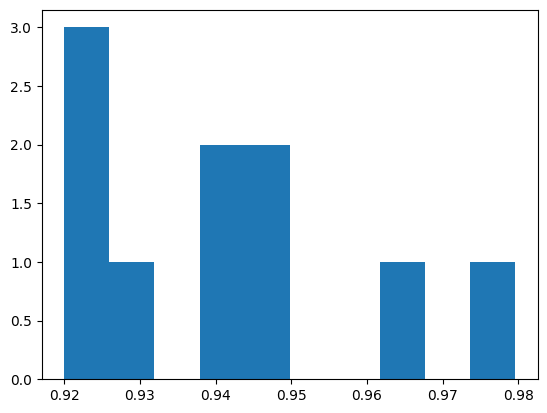

95.0 confidence interval 92.1% and 97.6%


In [21]:
plt.hist(scores)
plt.show()
alpha = 0.95
p = ((1.0 - alpha)/2.0) * 100
lower = max(0.0, np.percentile(scores, p))
p = (alpha + ((1.0 - alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

Leave-One-Out Cross Validation (LOOCV)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [31]:
df = pd.DataFrame({
    'y' : [6,8,12,14,14,15,17,22,24,23],
    'x1': [2,5,4,3,4,6,7,5,8,9],
    'x2': [14,12,12,13,7,8,7,4,6,5]
})

In [32]:
df

,y,x1,x2
0,6,2,14
1,8,5,12
2,12,4,12
3,14,3,13
4,14,4,7
5,15,6,8
6,17,7,7
7,22,5,4
8,24,8,6
9,23,9,5


In [33]:
x = df[['x1','x2']]
y = df['y']

In [34]:
cv = LeaveOneOut()

model = LinearRegression()

scores = cross_val_score(model, x, y, cv=cv, n_jobs = 1, scoring = 'neg_mean_absolute_error')

sqrt(mean(absolute(scores)))

1.7737403441166277